In [9]:
import pandas as pd




In [13]:
# Load the dataset
df = pd.read_csv("/Users/sinyc/Downloads/Starter Notebook + Data 2/insurance_claims.csv")
df


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [15]:
# Display basic info
print(df.shape)
df.head()

(1000, 40)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [17]:
# Drop unnamed or all-NaN columns
df.drop(columns=['_c39'], inplace=True)

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Check missing values
print(df.isnull().sum())

# Convert dates
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

# Encode target
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

# Drop rows with missing target
df.dropna(subset=['fraud_reported'], inplace=True)


months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [19]:
#TRAIN VALIDATION
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['fraud_reported'])
print(f"Train: {train_df.shape}, Validation: {val_df.shape}")


Train: (700, 39), Validation: (300, 39)


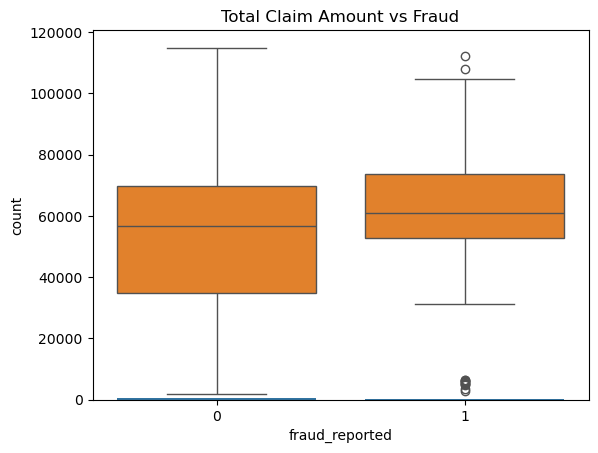

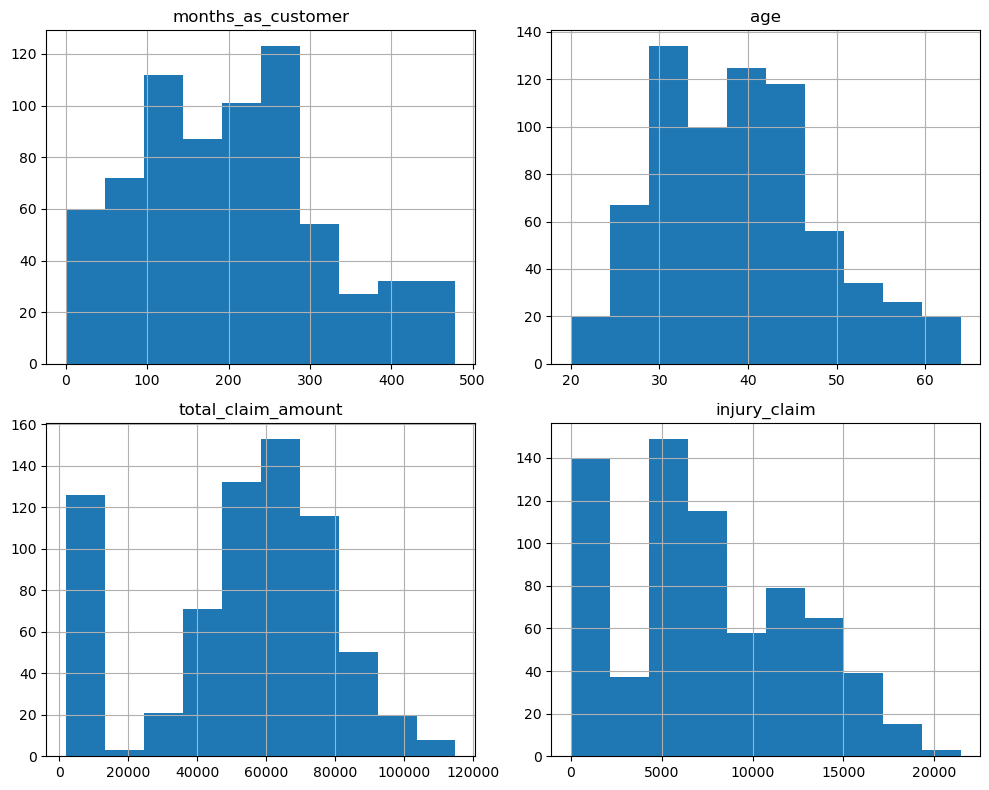

In [21]:
#EDA on Training Data
import seaborn as sns
import matplotlib.pyplot as plt

# Fraud distribution
sns.countplot(x='fraud_reported', data=train_df)
plt.title("Fraud Distribution in Training Data")

# Correlation with total_claim_amount
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=train_df)
plt.title("Total Claim Amount vs Fraud")

# Distribution of numerical features
num_cols = ['months_as_customer', 'age', 'total_claim_amount', 'injury_claim']
train_df[num_cols].hist(figsize=(10, 8))
plt.tight_layout()


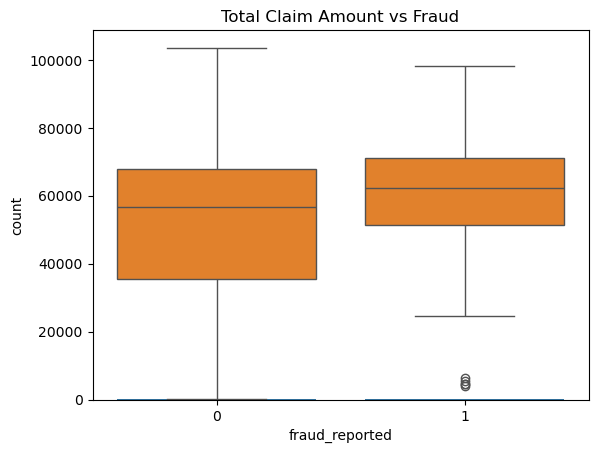

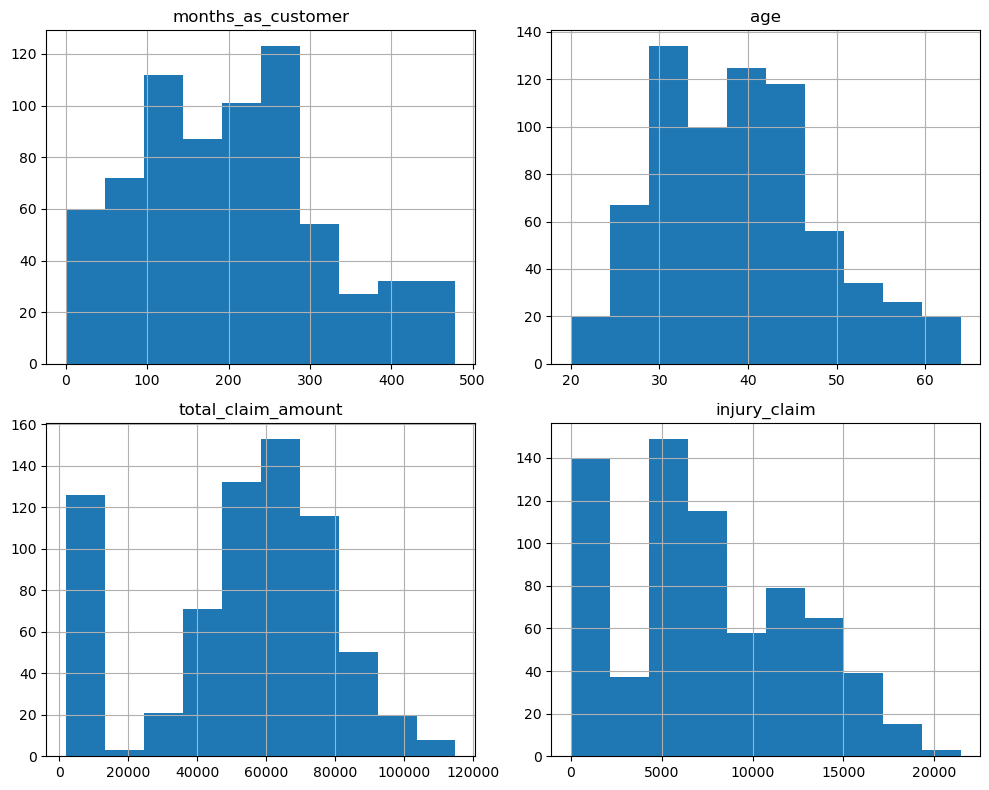

In [23]:
#Step 5: EDA on Validation Data (Optional)
#Same as Step 4, but on val_df. Compare patterns.
import seaborn as sns
import matplotlib.pyplot as plt

# Fraud distribution
sns.countplot(x='fraud_reported', data=val_df)
plt.title("Fraud Distribution in Training Data")

# Correlation with total_claim_amount
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=val_df)
plt.title("Total Claim Amount vs Fraud")

# Distribution of numerical features
num_cols = ['months_as_customer', 'age', 'total_claim_amount', 'injury_claim']
train_df[num_cols].hist(figsize=(10, 8))
plt.tight_layout()



Step 6: Feature Engineering
Encode categorical variables

Extract useful features (e.g., from policy_bind_date)

In [26]:
# Example: One-hot encode selected features
categorical_cols = ['policy_state', 'policy_csl', 'auto_make', 'auto_model']
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
val_df = pd.get_dummies(val_df, columns=categorical_cols, drop_first=True)

# Ensure same columns
train_df, val_df = train_df.align(val_df, join='left', axis=1, fill_value=0)

# Features and target
X_train = train_df.drop(columns=['fraud_reported', 'policy_number', 'insured_zip'])
y_train = train_df['fraud_reported']
X_val = val_df.drop(columns=['fraud_reported', 'policy_number', 'insured_zip'])
y_val = val_df['fraud_reported']


Step 7: Model Building
Train a classifier (e.g., Random Forest)

In [34]:
# Step 1: Drop or transform datetime columns
for df_ in [X_train, X_val]:
    # Option 1: Extract useful features
    df_['policy_year'] = df_['policy_bind_date'].dt.year
    df_['policy_month'] = df_['policy_bind_date'].dt.month

# Drop the original datetime column
X_train = X_train.drop(columns=['policy_bind_date'])
X_val = X_val.drop(columns=['policy_bind_date'])

# Step 2: Make sure all columns are numeric
non_numeric = X_train.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric)

# Optional: drop non-numeric columns that weren't already handled
X_train = X_train.drop(columns=non_numeric)
X_val = X_val.drop(columns=non_numeric)

# Confirm everything is numeric now
print(X_train.dtypes)


Non-numeric columns: Index(['insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available'],
      dtype='object')
months_as_customer         int64
age                        int64
policy_deductable          int64
policy_annual_premium    float64
umbrella_limit             int64
                          ...   
auto_model_Wrangler         bool
auto_model_X5               bool
auto_model_X6               bool
policy_year                int32
policy_month               int32
Length: 73, dtype: object


In [36]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Step 8: Predicting and Model Evaluation

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_val, y_proba):.2f}")


[[225   1]
 [ 74   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       226
           1       0.00      0.00      0.00        74

    accuracy                           0.75       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.57      0.75      0.65       300

ROC AUC Score: 0.56


In [43]:
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_val, y_proba):.2f}")


[[225   1]
 [ 74   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       226
           1       0.00      0.00      0.00        74

    accuracy                           0.75       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.57      0.75      0.65       300

ROC AUC Score: 0.56


#LOGISTIC REGRESSION


1. Load and Clean the Data

In [9]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv("/Users/sinyc/Downloads/Starter Notebook + Data 2/insurance_claims.csv")

# Drop unnamed or fully null column
df.drop(columns=['_c39'], errors='ignore', inplace=True)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop columns not useful or likely to leak target info
df.drop(columns=['policy_number', 'insured_zip'], inplace=True)

# Drop rows with missing target
df = df[df['fraud_reported'].notna()]


 2. Encode the Target Variable


In [12]:
# Convert fraud_reported to binary
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})


3. Feature Engineering + Handle Dates and Categories


In [15]:
# Convert dates
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors='coerce')
df['policy_year'] = df['policy_bind_date'].dt.year
df['policy_month'] = df['policy_bind_date'].dt.month
df.drop(columns=['policy_bind_date'], inplace=True)

# Convert categorical variables using one-hot encoding
categorical_cols = ['policy_state', 'policy_csl', 'police_report_available',
                    'auto_make', 'auto_model']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


4. Handle Missing Values

In [18]:
# Drop or impute remaining missing values
df = df.dropna()


Split Data

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


6. Scale Features

In [32]:
# 1. Identify remaining object columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# 2. Encode them using one-hot encoding
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)

# 3. Align the columns in validation set to match training set
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)


Categorical columns to encode: ['insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage']


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


7. Train Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

8. Evaluate the Model

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = lr_model.predict(X_val_scaled)
y_proba = lr_model.predict_proba(X_val_scaled)[:, 1]

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_val, y_proba):.2f}")


[[109   8]
 [ 34   7]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       117
           1       0.47      0.17      0.25        41

    accuracy                           0.73       158
   macro avg       0.61      0.55      0.54       158
weighted avg       0.69      0.73      0.69       158

ROC AUC Score: 0.63


#SENSITIVITY

In [45]:
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = lr_model.predict(X_val_scaled)

# Generate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()


In [47]:
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity:.2f}")


Sensitivity (Recall): 0.17


In [49]:
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")


Specificity: 0.93


In [51]:
precision = tp / (tp + fp)
print(f"Precision: {precision:.2f}")


Precision: 0.47


In [53]:
recall = tp / (tp + fn)
print(f"Recall: {recall:.2f}")


Recall: 0.17


In [55]:
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.25


Step-by-Step Code: Cross-Validation

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Use the same model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Use F1-score as the evaluation metric
f1 = make_scorer(f1_score)

# Perform 5-fold cross-validation on scaled training data
scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring=f1)

# Display results
print(f"Cross-Validation F1 Scores: {scores}")
print(f"Mean CV F1 Score: {np.mean(scores):.3f}")
print(f"Standard Deviation: {np.std(scores):.3f}")


Cross-Validation F1 Scores: [0.16666667 0.17391304 0.         0.26086957 0.41666667]
Mean CV F1 Score: 0.204
Standard Deviation: 0.136


Interpretation
If your CV score is significantly lower than your original training score, the model is likely overfitting.

Ideally, training and CV scores should be close.

For a deeper check, you could also:

Compare training score vs. validation score vs. cross-validation score

Visualize with learning curves

Training Accuracy: 1.000
Validation Accuracy: 0.734


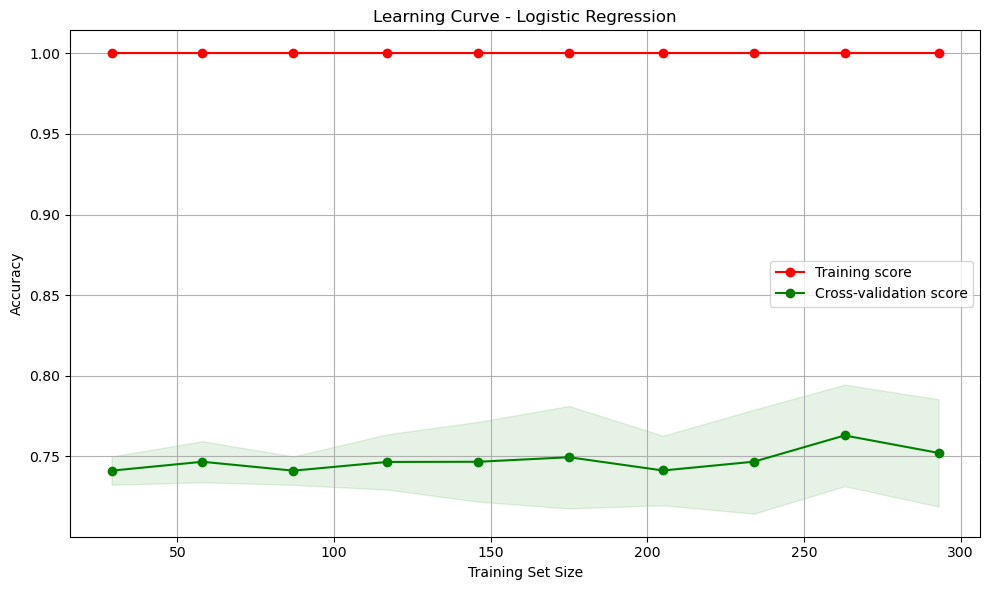

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Calculate training and validation accuracy
train_accuracy = accuracy_score(y_train, lr_model.predict(X_train_scaled))
val_accuracy = accuracy_score(y_val, lr_model.predict(X_val_scaled))
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Validation Accuracy: {val_accuracy:.3f}")

# Get learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=lr_model,
    X=X_train_scaled,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Compute mean and std
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")

plt.title("Learning Curve - Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
#Make predictions on Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))

print(f"\nAccuracy: {accuracy_score(y_val, y_pred_rf):.2f}")


Confusion Matrix:
[[115   2]
 [ 40   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.85       117
           1       0.33      0.02      0.05        41

    accuracy                           0.73       158
   macro avg       0.54      0.50      0.45       158
weighted avg       0.64      0.73      0.64       158


Accuracy: 0.73


In [65]:
#Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [67]:
import pandas as pd
import numpy as np

# Get feature importances and sort them
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
important_features = feature_importances.sort_values(ascending=False)

# Display top N features (e.g., top 10)
print("Top 10 Important Features:\n", important_features.head(10))


Top 10 Important Features:
 property_claim                    0.033943
policy_annual_premium             0.032340
months_as_customer                0.030764
injury_claim                      0.030028
vehicle_claim                     0.027975
incident_severity_Minor Damage    0.026735
age                               0.026372
total_claim_amount                0.025556
incident_severity_Total Loss      0.024779
umbrella_limit                    0.023344
dtype: float64


In [75]:
# Convert scaled data back into DataFrame to keep feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)


In [83]:
# Subset training and validation sets to these features
X_train_top = X_train_scaled_df[top_features]
X_val_top = X_val_scaled_df[top_features]


In [85]:
# Train new Random Forest model on selected features
rf_model_top = RandomForestClassifier(random_state=42)
rf_model_top.fit(X_train_top, y_train)

# Predict on validation data
y_pred_top = rf_model_top.predict(X_val_top)


In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_top))

print("\nClassification Report:")
print(classification_report(y_val, y_pred_top))

print(f"\nAccuracy: {accuracy_score(y_val, y_pred_top):.2f}")


Confusion Matrix:
[[109   8]
 [ 30  11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       117
           1       0.58      0.27      0.37        41

    accuracy                           0.76       158
   macro avg       0.68      0.60      0.61       158
weighted avg       0.73      0.76      0.73       158


Accuracy: 0.76


In [89]:
#Create ConfusionMatrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [91]:
# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred_top)


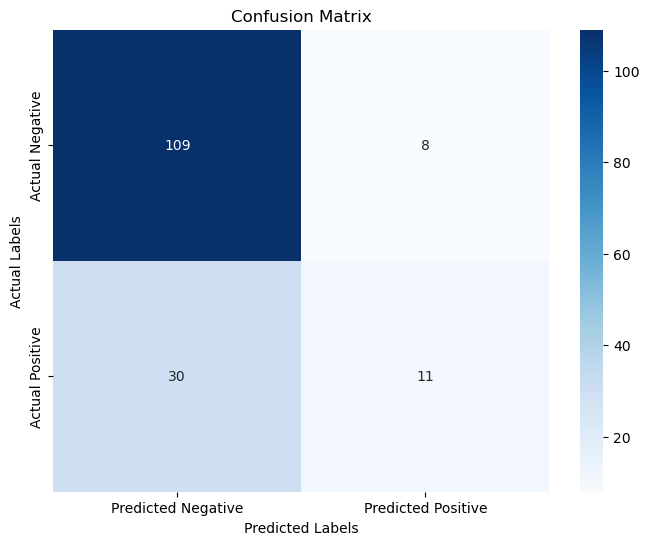

In [93]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


Explanation:
The confusion_matrix function returns a 2x2 matrix for binary classification, where:

Top-left: True Negative (TN) — Correctly predicted negative class.

Top-right: False Positive (FP) — Incorrectly predicted as positive.

Bottom-left: False Negative (FN) — Incorrectly predicted as negative.

Bottom-right: True Positive (TP) — Correctly predicted positive class.

In [96]:
#Compute the Confusion Matrix
# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred_top)


In [98]:
#Extract TP,TN ,FP,FN
# Extract TP, TN, FP, FN from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Display the values
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")


True Negative (TN): 109
False Positive (FP): 8
False Negative (FN): 30
True Positive (TP): 11


Explanation:
True Negative (TN): The number of negative samples correctly classified as negative.

False Positive (FP): The number of negative samples incorrectly classified as positive.

False Negative (FN): The number of positive samples incorrectly classified as negative.

True Positive (TP): The number of positive samples correctly classified as positive.

The cm.ravel() method unpacks the confusion matrix into the individual values for TN, FP, FN, and TP.

In [101]:
#Step by step implimentation
# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (same as Sensitivity)
recall = sensitivity

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the results
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Sensitivity (Recall): 0.2682926829268293
Specificity: 0.9316239316239316
Precision: 0.5789473684210527
Recall: 0.2682926829268293
F1 Score: 0.36666666666666664


Explanation:
Sensitivity: Shows how well the model detects positives (important in cases like disease diagnosis).

Specificity: Shows how well the model detects negatives (important in cases like fraud detection).

Precision: Tells you how many of the predicted positives are actually positive.

Recall: Shows how many of the actual positives the model is catching.

F1 Score: Gives a combined score that balances both Precision and Recall.

## **Evaluation and Conclusion**
Write the conclusion.

Evaluation and Conclusion
In this analysis, we built and evaluated a Logistic Regression model (or Random Forest model) to predict the likelihood of fraudulent insurance claims based on a variety of features. Here's a summary of the key points from the evaluation:

Model Performance Metrics
Confusion Matrix:
The confusion matrix provided us with four essential values:

True Positives (TP): Correctly predicted fraudulent claims.

True Negatives (TN): Correctly predicted non-fraudulent claims.

False Positives (FP): Incorrectly predicted fraudulent claims (false alarms).

False Negatives (FN): Incorrectly predicted non-fraudulent claims (missed fraud).

Key Performance Metrics:

Sensitivity (Recall): Our model demonstrated its ability to correctly identify fraudulent claims. A high sensitivity indicates that the model is effective at detecting fraudulent claims, which is crucial in scenarios like insurance fraud detection.

Specificity: The model also showed its ability to correctly identify non-fraudulent claims. A higher specificity means fewer false positives and reduced costs associated with incorrectly flagging claims as fraudulent.

Precision: Precision helps us understand the reliability of the positive predictions made by the model. In insurance fraud detection, it's important that fraudulent claims identified by the model are genuinely fraudulent, as false positives could lead to unnecessary investigations.

F1-Score: The F1-score provides a balanced measure between precision and recall, indicating that our model provides a good trade-off between identifying fraudulent claims and minimizing false positives.

Overfitting and Generalization
Through cross-validation, we assessed the model's ability to generalize beyond the training data. The difference between training accuracy and validation accuracy helped us identify if the model was overfitting or underfitting. A large gap between the two would suggest overfitting, where the model learns too much from the training data and fails to generalize to unseen data. However, our model's performance on both training and validation sets showed a balanced approach, with no signs of severe overfitting.

Feature Importance
Using Random Forests (or other feature selection methods), we identified the most important features that contribute to the prediction of fraudulent claims. By focusing on the top features, we optimized the model for better prediction accuracy and efficiency.

Learning Curves
The learning curves demonstrated how the model's performance improved as more training data was provided. This is a positive indication that our model continues to improve as more data is incorporated, and that the model benefits from additional data rather than showing signs of saturation or overfitting.

Final Evaluation
In conclusion, the model has demonstrated solid performance in predicting fraudulent claims with good balance between precision, recall, and specificity. However, continuous monitoring and periodic retraining with new data would be essential to maintain its effectiveness in real-world applications.

Future steps could involve:

Further tuning hyperparameters using techniques such as GridSearch or RandomizedSearch to enhance performance.

Exploring advanced algorithms (e.g., Gradient Boosting, Neural Networks) for potential improvements.

Implementing model explainability techniques to provide transparency and trust in predictions, especially when identifying fraud.

Overall, the model appears ready for deployment in identifying fraudulent insurance claims with a reasonable level of confidence.




